In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,ifft
import matplotlib.pyplot as plt

In [2]:
#Frecuencia de muestreo
Fs = 5000
#Tiempo de muestreo
T = 1/Fs
#Número de muestras
L = 5000
#Vector tiempo de referencia
tr = list(range(0, L, 1))
t = np.array(tr, dtype="float32")*T


#Señal - Sintesis
senial = 0.7*np.sin(2*(np.pi)*250*t)+ 0.4*np.sin(2*(np.pi)*800*t)+0.1*np.sin(2*(np.pi)*1450*t)

#Ruido aleatorio
ruido = 2*((np.random.rand(t.size)-0.5))

#Mezcla
A = 0.5 #factor para modular el ruido (A puede ir desde 0.0 hasta 10.0)
SyR = senial+A*ruido


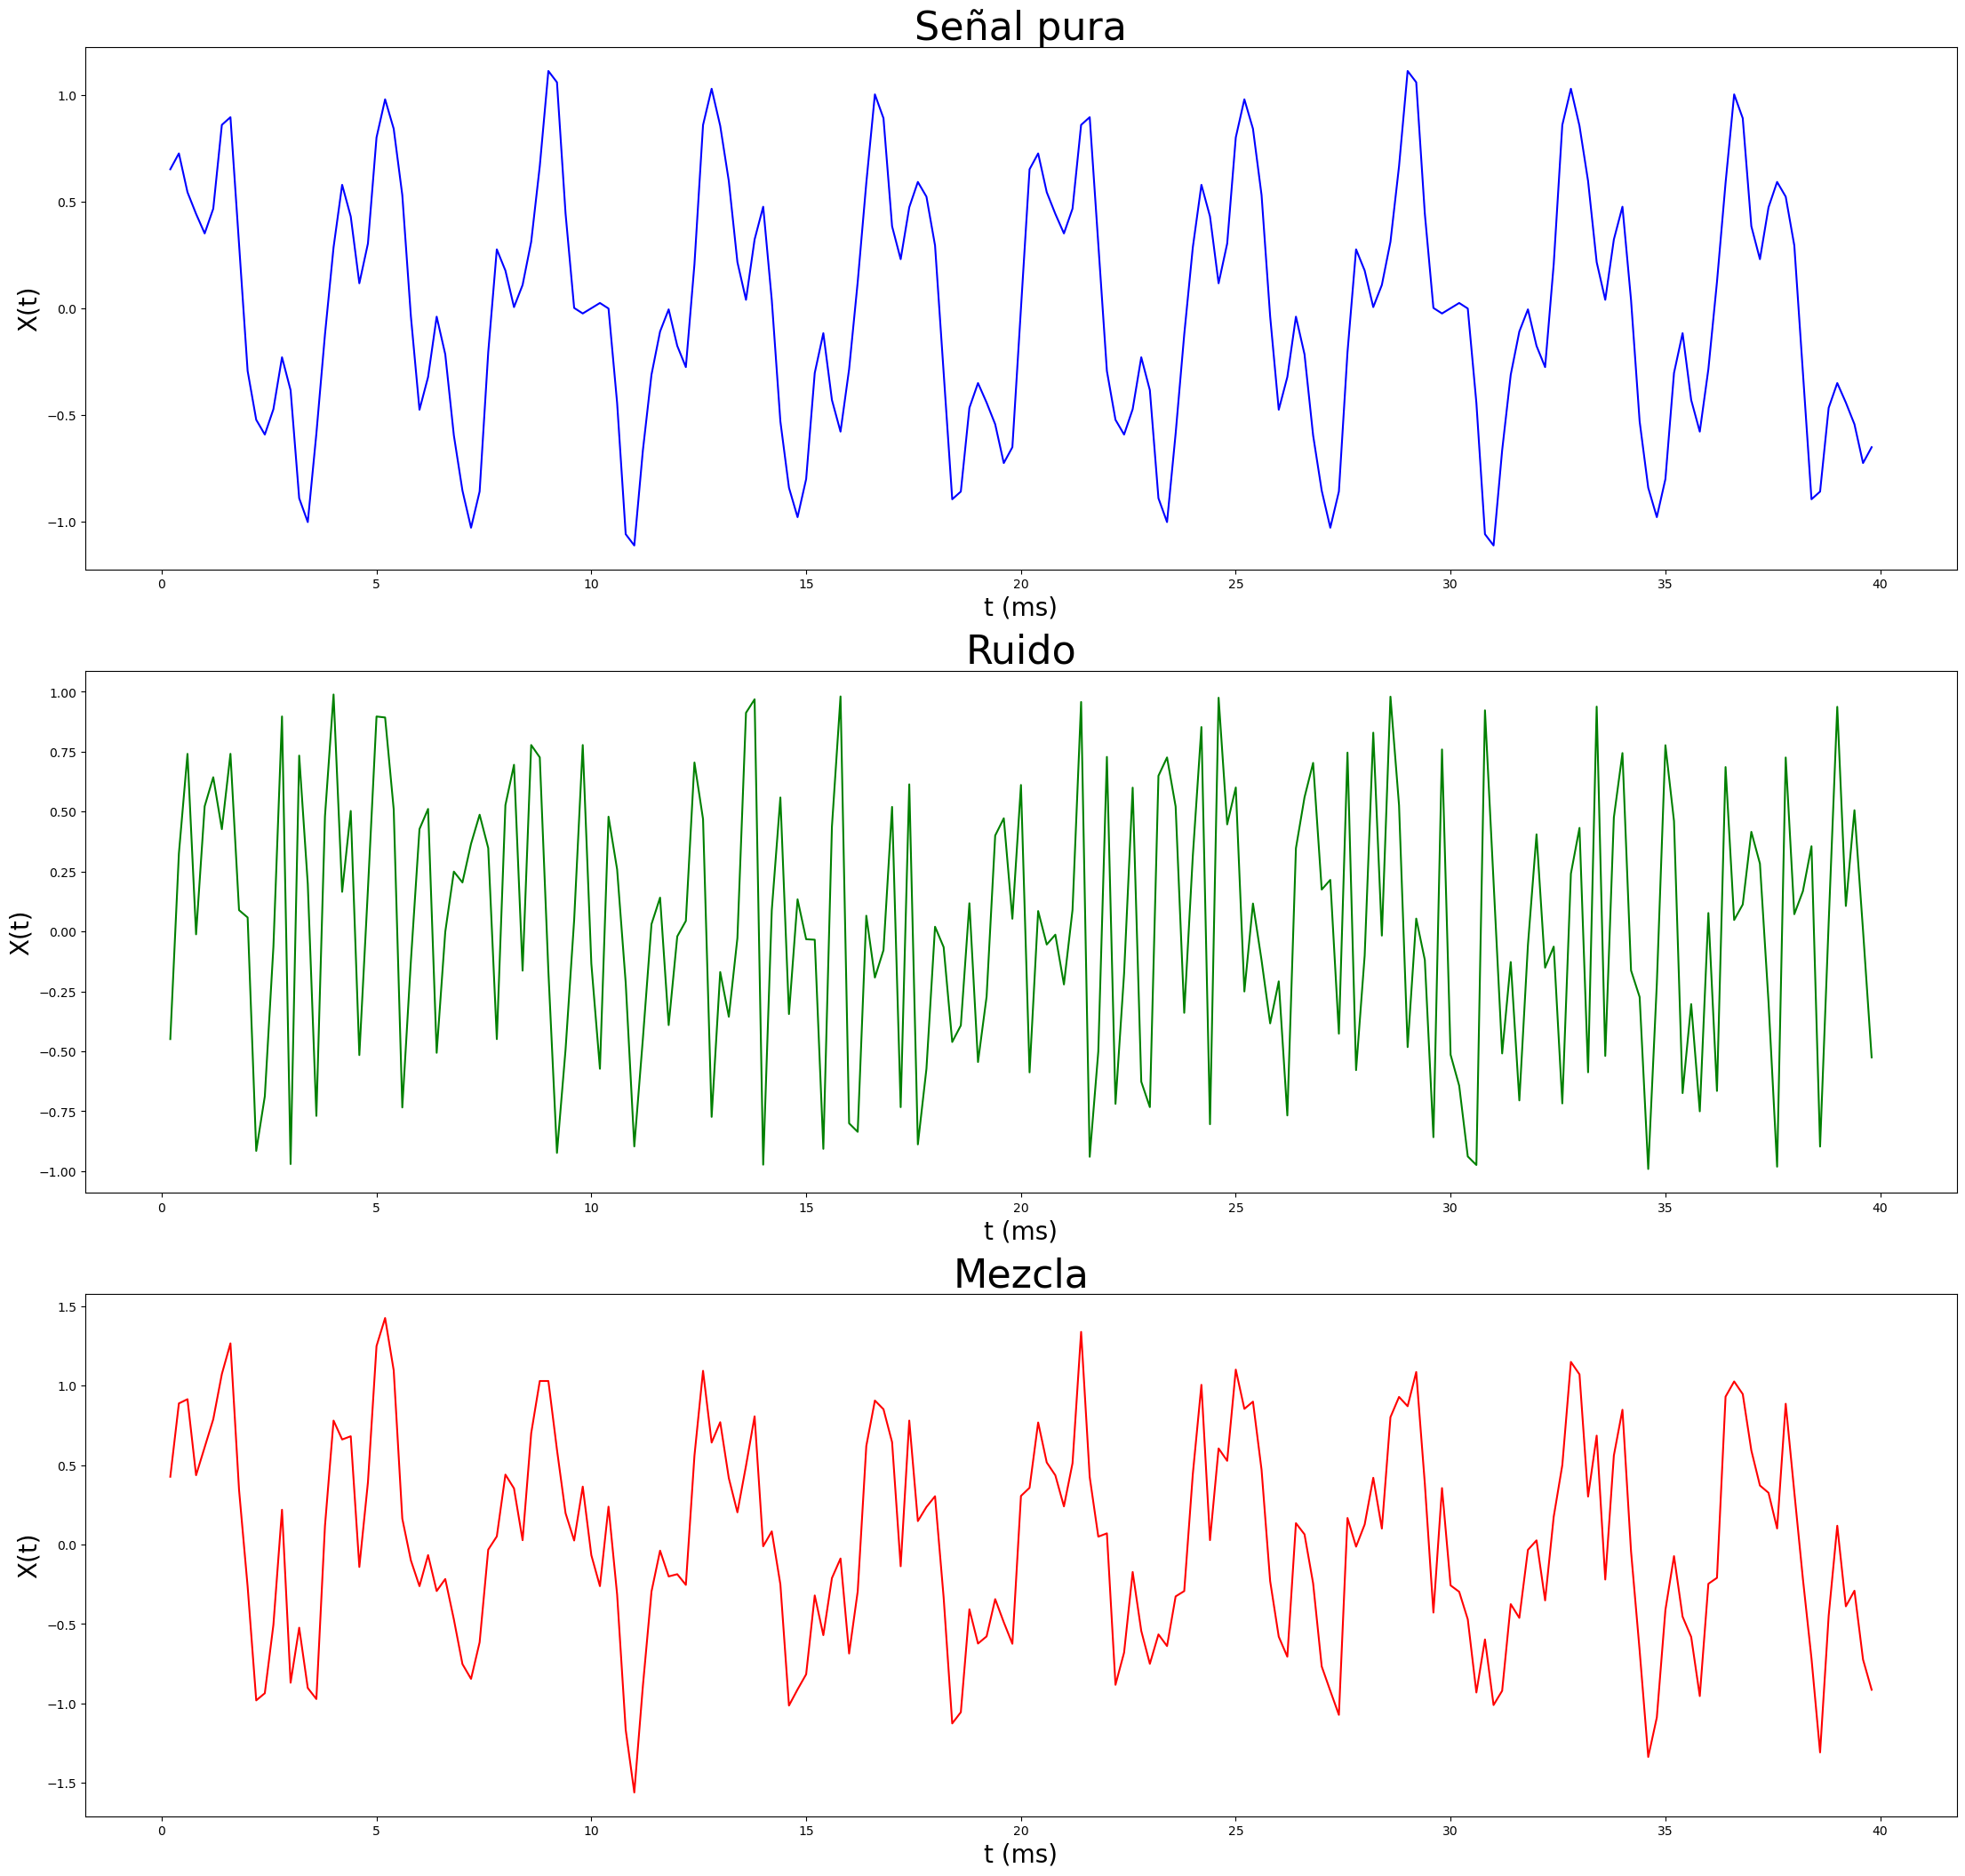

In [3]:
#Visualización
p1=1
p2=200 #Desplegar las primeras 200 muestras para que no sea tan denso
fig, axes = plt.subplots(3, 1,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].plot(1000*t[p1:p2],senial[p1:p2], 'b')
axes[0].set_xlabel('t (ms)', fontsize=20)
axes[0].set_ylabel('X(t)', fontsize=20)
axes[0].set_title('Señal pura', fontsize=32)

axes[1].plot(1000*t[p1:p2],ruido[p1:p2], 'g')
axes[1].set_xlabel('t (ms)', fontsize=20)
axes[1].set_ylabel('X(t)', fontsize=20)
axes[1].set_title('Ruido', fontsize=32)

axes[2].plot(1000*t[p1:p2],SyR[p1:p2], 'r')
axes[2].set_xlabel('t (ms)', fontsize=20)
axes[2].set_ylabel('X(t)', fontsize=20)
axes[2].set_title('Mezcla', fontsize=32)
plt.show()

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile
from IPython.display import display, Audio

soundfile.write(file='sine2.wav', data=SyR, samplerate=5000, subtype='PCM_16')
display(Audio('sine2.wav'))

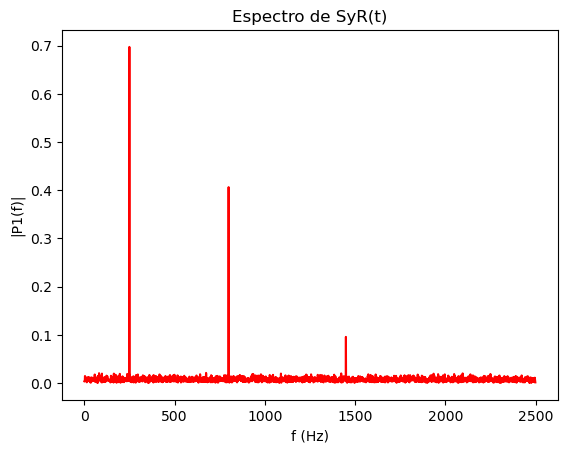

In [5]:
#Transformada de Fourier
Y = np.fft.fft(SyR)       #Espectro
P2 = abs(Y/L)             #Adecuación para ver la magnitud
P1 = P2[1:int(L/2)+1]      #Sección representativa del espectro
P1[2:-1] = 2*P1[2:-1]    #Doblado del espectro

zz = list(range(0, int(L/2)))
z = np.array(zz, dtype="float32")
f = Fs*z/L          #Escalado

plt.plot(f, P1, color='red')
plt.title('Espectro de SyR(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()